## SVM Kernel Practice Implimentation 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(-5.0,5.0,100)
y=np.sqrt(10**2-x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [3]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

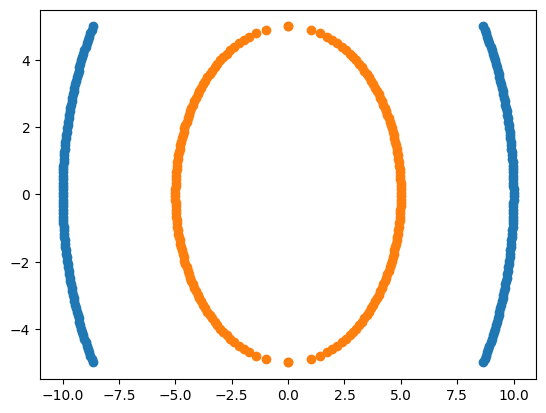

In [4]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [5]:
import pandas as pd
df1=pd.DataFrame(np.vstack([y,x]).T, columns=['x1','x2'])
df1['Y']=0
df2=pd.DataFrame(np.vstack([y1,x1]).T, columns=['x1','x2'])
df2['Y']=1

frame=df1,df2
df=pd.concat(frame)
df.head(5)

,x1,x2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [6]:
df.tail(5)

,x1,x2,Y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


# polynomial kernal

## $$ K(x,y)=(x^T * y +c)^d $$ 

## BAsed on the formula find the components for the Polynomial kernel

* y=[x**2   x1x2

   x1x2   x2**2]

In [7]:
#craete points maually..but u ca make it Autometecaly 

df['x1_square']=df['x1']**2
df['x2_square']=df['x2']**2

In [8]:
df['x1*x2']=df['x1']*df['x2']

In [9]:
df.head(5)

,x1,x2,Y,x1_square,x2_square,x1*x2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [10]:
### Independent and dependent features
x=df[['x1_square','x2_square','x1*x2']]
y=df['Y']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=0)

In [12]:
X_train.head()

,x1_square,x2_square,x1*x2
50,24.997449,0.002551,0.252512
63,98.140496,1.859504,13.508984
112,10.651974,14.348026,-12.362637
159,99.079176,0.920824,9.551676
83,13.549638,11.450362,12.455852


In [13]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [14]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

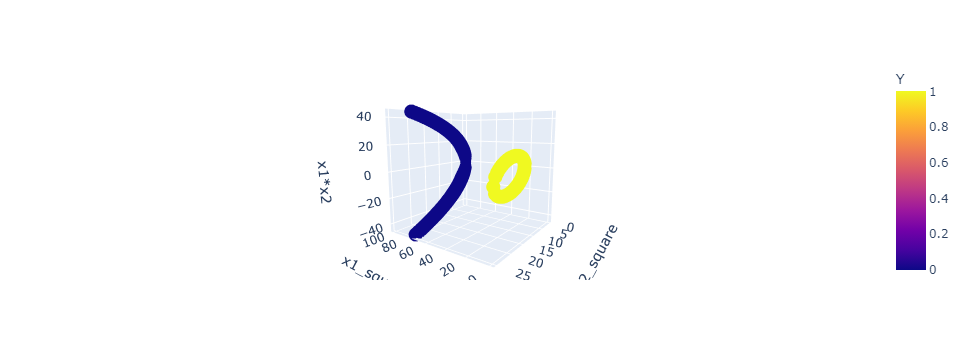

In [15]:
import plotly.express as px
fig = px.scatter_3d(df, x='x1_square', y='x2_square', z='x1*x2', color='Y')
fig.show()
plt.show()

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier= SVC(kernel="linear")
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

## RBF kernel:-

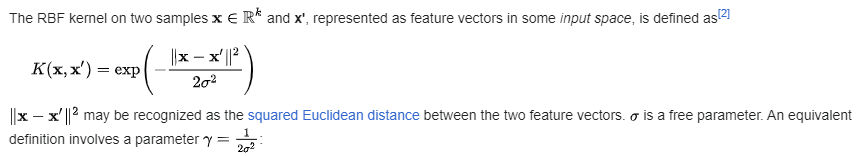

In [23]:
df.head()

,x1,x2,Y,x1_square,x2_square,x1*x2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [25]:
# Independent features
X=df.iloc[:,0:2]
y=df.Y

In [26]:
x.head()

,x1_square,x2_square,x1*x2
0,75.000000,25.000000,-43.301270
1,75.999898,24.000102,-42.708375
2,76.979390,23.020610,-42.096467
3,77.938476,22.061524,-41.466150
4,78.877155,21.122845,-40.818009


In [27]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [28]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=0)

In [30]:
## classifier= SVC(kernel="linear") insted of 'linear' use 'rbf'

classifier= SVC(kernel="rbf")
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [31]:
classifier= SVC(kernel="sigmoid")
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.76